In [1]:
%matplotlib inline
import hyperspy.api as hs
import os

In [2]:
#spreadsheet can be found here: /dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/
#load data (binned diffraction plane)
fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/binned_MoS2_15kV_100umClAp_3Mx_focus_A2_1p07.hdf5'
d = hs.load(fp, lazy = True)
#reset navigation offset
d.axes_manager.navigation_axes[0].offset = 0
d.axes_manager.navigation_axes[1].offset = 0

In [3]:
#take every 4th probe position so can quickly visualise data
d_sub = d.inav[::4, ::4]
d_sub.compute()

[########################################] | 100% Completed | 16.2s


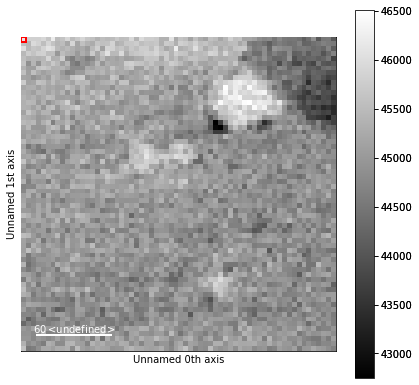

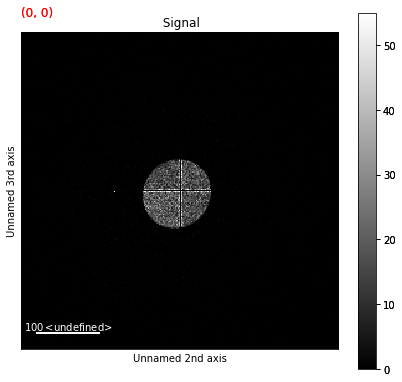

In [4]:
d_sub.plot()

In [7]:
%matplotlib qt 
#pop out plot - you may need to run this a couple of times

In [8]:
px_in_crop = 64
d_sub.plot()
sq_roi = hs.roi.RectangularROI(0,0,px_in_crop,px_in_crop)
roi_dat = sq_roi.interactive(d_sub)


In [10]:
%matplotlib inline
#return to inline

RectangularROI(left=188, top=36, right=252, bottom=100)


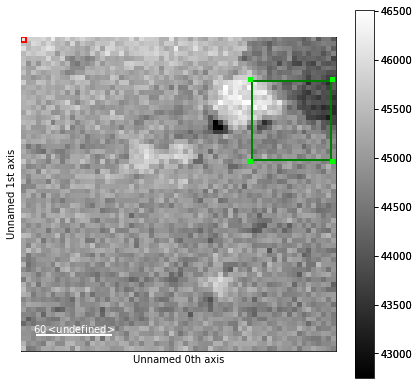

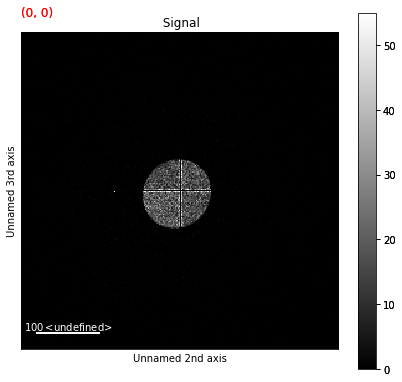

In [11]:
#show area to be cropped
d_sub.plot()
roi_dat = sq_roi.interactive(d_sub)
print(sq_roi)

[########################################] | 100% Completed | 13.2s


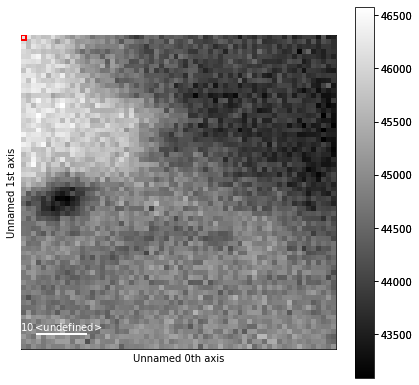

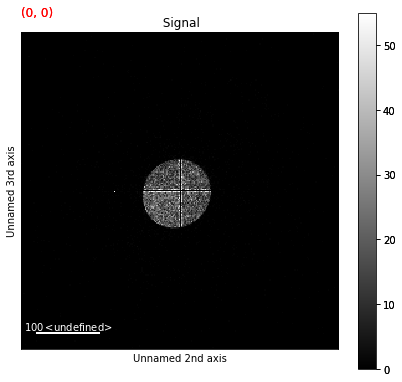

In [12]:
#get cropped region from full data set
d_crop = sq_roi(d)
d_crop.compute()
d_crop.plot()

In [14]:
#save_data\2020\cm26481-1\processing\Merlin\20200130_80kV_graphene_600C_pty\cluster\processing\pycho
identifier = '_new'
crop_shape = d_crop.data.shape
scan_str = '_scan' + str(crop_shape[0]) + 'x' + str(crop_shape[1])
diff_str = '_diff' + str(crop_shape[2]) + 'x' + str(crop_shape[3])
file_path, file_name = os.path.split(f/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/cropscan_binned_MoS2_15kV_100umClAp_3Mx_focus_A2_1p07_scan64x64_diff256x256_new.hdf5p)
save_file = file_path + '/cropscan_' + file_name[:-5] + scan_str + diff_str + identifier + '.hdf5'
d_crop.save(save_file)
print('saved to : ' + save_file)
# '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145013/cropscan_binned_MoS2_15kV_50umClAp_3Mx_focus_A2_1p07_scan64x64_diff256x256.hdf5'
#d_crop.save(sn)

saved to : /dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/cropscan_binned_MoS2_15kV_100umClAp_3Mx_focus_A2_1p07_scan64x64_diff256x256_new.hdf5


In [8]:
#save_file = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/cropscan_binned_MoS2_15kV_100umClAp_3Mx_focus_A2_1p07_scan64x64_diff256x256_new.hdf5'